# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)   
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.  
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).  

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей работает хуже, чем логистическая регрессия.**

Нам нужно сделать так чтобы расстояния от точек одного класса до точек другого класса было ближе, чем расстояние до точек своего класса. Для этого нужно сделать какой-нибудь вытянутый датасет со слегка пересекающимися точками.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

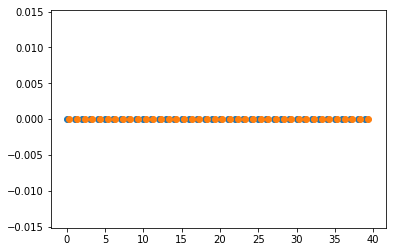

In [387]:
xs, ys = [], []
for i in range(0, 40):
    x = i
    y = 0
    xs.append(x)
    ys.append(y)
xd, yd = [], []
for i in range(0, 40):
    x = i + 0.3
    y = 0
    xd.append(x)
    yd.append(y)
plt.scatter(xs, ys)
plt.scatter(xd, yd)

In [388]:
for el in xs:
    xd.append(el)
for el in ys:
    yd.append(el)
X = xd
Xy = yd
Y = [1]*len(X) + [0]*len(Xy)

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X + Xy, Y, random_state=42)

In [390]:
knn = KNeighborsClassifier(n_neighbors=7)
logisticRegr = LogisticRegression()

5-fold cv

In [391]:
score1 = cross_val_score(logisticRegr, np.array(X_test).reshape((len(X_test), 1)), y_test, cv=5, scoring='accuracy')
score2 = cross_val_score(knn, np.array(X_test).reshape((len(X_test), 1)), y_test, cv=5, scoring='accuracy')
print('logistic regression ', score1)
print('knn ', score2)

logistic regression  [1.         1.         1.         1.         0.71428571]
knn  [1.         1.         1.         1.         0.57142857]


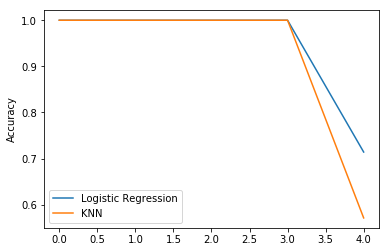

In [392]:
n = np.arange(0, 5)
plt.plot(n, score1, label='Logistic Regression')
plt.plot(n, score2, label='KNN')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

Как-то не сильно лучше логистическая регрессия работает, но немного лучше.

Попробуем другой датасет. Тут один класс как бы внутри другого класса, и точки, которые на внешней окружности ближе к точкам в центре окружности, чем к точкам по другую сторону диаметра окружности, поэтому knn должен хуже разделять.

In [487]:
class Circle:
    def __init__(self, origin, radius):
        self.origin = origin
        self.radius = radius

In [488]:
origin = (0, 0)
radius = 10
circle = Circle(origin, radius)

In [489]:
import random
import math

xs, ys = [], []
for i in range(0, 500):
    p = random.random() * 2 * math.pi
    r = circle.radius * random.random()
    x = math.cos(p) * r
    y = math.sin(p) * r
    xs.append(x)
    ys.append(y)

In [490]:
n = 500
r = radius + 5
xs2 = []
ys2 = []
for x in range(0, n+1):
    xs2.append(math.cos(2*math.pi/n*x)*r)
    ys2.append(math.sin(2*math.pi/n*x)*r)

In [491]:
n = 500
r = radius + 6
xs3 = []
ys3 = []
for x in range(0, n+1):
    xs3.append(math.cos(2*math.pi/n*x)*r)
    ys3.append(math.sin(2*math.pi/n*x)*r)

In [492]:
for el in xs3:
    xs2.append(el)
for el in ys3:
    ys2.append(el)

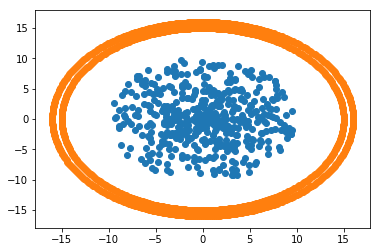

In [493]:
plt.scatter(xs, ys)
plt.scatter(xs2 ,ys2)

In [494]:
for el in xs2:
    xs.append(el)
for el in ys2:
    ys.append(el)
X = xs
Xy = ys
Y = [1]*len(X) + [0]*len(Xy)

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X + Xy, Y, random_state=42)

In [496]:
df = pd.DataFrame({'X_train': X_train, 'y_train' : y_train})
df2 = pd.DataFrame({'X_test': X_test, 'y_test' : y_test})
y_train = df.y_train.astype('int')
y_test = df2.y_test.astype('int')

Train and find accuracy for the KNN:

In [497]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(np.array(X_train).reshape((len(X_train), 1)), y_train)
knn.score(np.array(X_test).reshape((len(X_test), 1)), y_test)  # mean accuracy

0.35153129161118507

In [498]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.array(X_train).reshape((len(X_train), 1)), y_train)
    
    train_accuracy[i] = knn.score(np.array(X_train).reshape((len(X_train), 1)), y_train)
    
    test_accuracy[i] = knn.score(np.array(X_test).reshape((len(X_test), 1)), y_test)  # mean accuracy

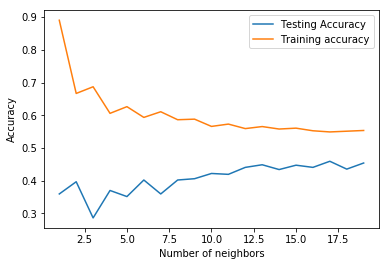

In [499]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

7 neighbours seem to be fine choice. So the accuracy on the test set for KNN will be:

In [500]:
test_accuracy[7]

0.4021304926764314

So now we just need to prove that logistic regression works better on the present dataset

In [501]:
logisticRegr = LogisticRegression(penalty='l2',C = 1,random_state = 0)
logisticRegr.fit(np.array(X_train).reshape((len(X_train), 1)), y_train)
predictions = logisticRegr.predict(np.array(X_test).reshape((len(X_test), 1)))

In [502]:
score = logisticRegr.score(np.array(X_test).reshape((len(X_test), 1)), y_test)
print(score)

0.48202396804260983


As we can see logistic regression gives a better accuracy prediction.

Валидация с помощью 5-fold cv:

In [503]:
knn = KNeighborsClassifier(n_neighbors=7)
logisticRegr = LogisticRegression()

In [504]:
score1 = cross_val_score(logisticRegr, np.array(X_test).reshape((len(X_test), 1)), y_test, cv=5, scoring='accuracy')
score2 = cross_val_score(knn, np.array(X_test).reshape((len(X_test), 1)), y_test, cv=5, scoring='accuracy')
print('logistic regression ', score1)
print('knn ', score2)

logistic regression  [0.43046358 0.53642384 0.52       0.58       0.51006711]
knn  [0.38410596 0.43046358 0.44666667 0.48       0.42281879]


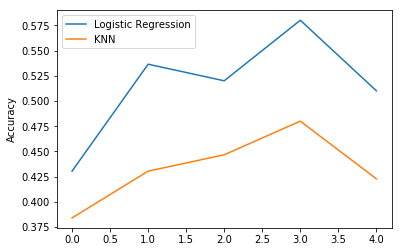

In [505]:
n = np.arange(0, 5)
plt.plot(n, score1, label='Logistic Regression')
plt.plot(n, score2, label='KNN')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

**2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором логистическая регрессия работает хуже, чем метод ближайших соседей.**

Тут нам нужно сделать так, чтобы датасет был линейно не разделим.

In [411]:
def generate_dots(origin, radius):
    circle = Circle(origin, radius)
    xs, ys = [], []
    for i in range(0, 1000):
        p = random.random() * 2 * math.pi
        r = circle.radius * random.random()
        x = math.cos(p) * r + origin[0]
        y = math.sin(p) * r + origin[1]
        xs.append(x)
        ys.append(y)
    return xs, ys

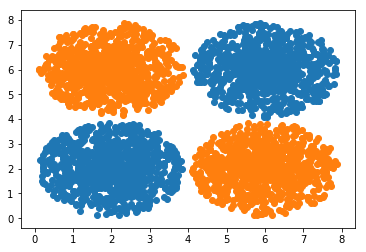

In [412]:
x1, y1 = generate_dots((2,2), 1.9)
x2, y2 = generate_dots((6,6), 1.9)
x3, y3 = generate_dots((2,6), 1.9)
x4, y4 = generate_dots((6,2), 1.9)
for el in x2:
    x1.append(el)
for el in y2:
    y1.append(el)
for el in x4:
    x3.append(el)
for el in y4:
    y3.append(el)
plt.scatter(x1, y1)
plt.scatter(x3, y3)

In [413]:
knn1 = KNeighborsClassifier(n_neighbors=7)
logisticRegr1 = LogisticRegression()

In [414]:
# preprocessing
for el in x3:
    x1.append(el)
for el in y3:
    y1.append(el)
X = x1
Xy = y1
Y = [1]*len(X) + [0]*len(Xy)
X_train, X_test, y_train, y_test = train_test_split(X+Xy, Y, random_state=42)
df = pd.DataFrame({'X_train': X_train, 'y_train' : y_train})
df2 = pd.DataFrame({'X_test': X_test, 'y_test' : y_test})
y_train = df.y_train.astype('int')
y_test = df2.y_test.astype('int')

In [415]:
score1 = cross_val_score(logisticRegr1, np.array(X_test).reshape((len(X_test), 1)), y_test, cv=5, scoring='accuracy')
score2 = cross_val_score(knn1, np.array(X_test).reshape((len(X_test), 1)), y_test, cv=5, scoring='accuracy')
print('logistic regression ', score1)
print('knn ', score2)

logistic regression  [0.48129676 0.48628429 0.4425     0.49373434 0.50877193]
knn  [0.52369077 0.54862843 0.485      0.44360902 0.47117794]


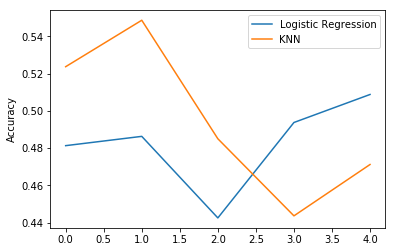

In [416]:
n = np.arange(0, 5)
plt.plot(n, score1, label='Logistic Regression')
plt.plot(n, score2, label='KNN') 
plt.legend()
plt.ylabel('Accuracy')
plt.show()

KNN немного лучше логистической регрессии.

**3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.**

Косинусное расстояние учитывает только угол, а евклидово расстояние учитывает и угол, и величину вектора (в смысле координаты).

Опять же, как и в первом задании, чтобы knn работал хуже нам надо, чтобы расстояния от точек одного класса до точек другого класса было ближе, чем расстояние до точек своего класса. Но при этом все точки должны однозначно опозноваться с помощью косинусного расстояния. Для этого точки разных классов должны лежать на двух разных прямых, которые наклонены по отношению друг к другу с очень маленьким углом, чтобы это была почти как одна линия, и это мешала эвклидову расстоянию.

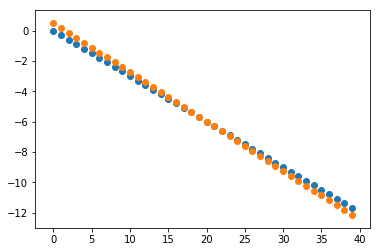

In [51]:
xs, ys = [], []
for i in range(0, 40):
    x = i
    y = - i * 0.3
    xs.append(x)
    ys.append(y)
xd, yd = [], []
for i in range(0, 40):
    x = i
    y = - i * 0.325 + 0.5
    xd.append(x)
    yd.append(y)
plt.scatter(xs, ys)
plt.scatter(xd, yd)

In [52]:
for el in xs:
    xd.append(el)
for el in ys:
    yd.append(el)
X = xd
Xy = yd
Y = [1]*len(X) + [0]*len(Xy)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X + Xy, Y, random_state=42)

In [54]:
cosine = KNeighborsClassifier(n_neighbors=7, metric='cosine')
euclidean = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [55]:
score1 = cross_val_score(cosine, np.array(X_test).reshape(-1, 1), y_test, cv=5, scoring='accuracy')
score2 = cross_val_score(euclidean, np.array(X_test).reshape(-1, 1), y_test, cv=5, scoring='accuracy')
print('Cosine', score1)
print('Euclidean', score2)

Cosine [1. 1. 1. 1. 1.]
Euclidean [1.         1.         1.         1.         0.57142857]


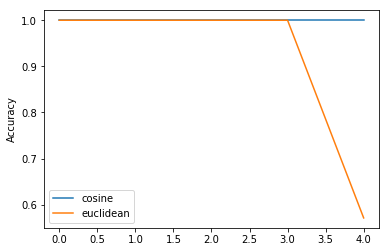

In [56]:
n = np.arange(0, 5)
plt.plot(n, score1, label='cosine')
plt.plot(n, score2, label='euclidean')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

**4. Сгенерировать датасет для задачи регрессии (MSE),
на котором решающее дерево работает хуже, чем линейная регрессия.** 

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

Возьмё датасет, в котором простая линейная зависимость x от y и один единственный outlier. В такой ситуации линейная регрессия должна отработать лучше, чем решающее дерево. Решающее дерево работает лучше линейной регрессии, когда в данных много шума, но не когда только одна ошибка на весь датасет.

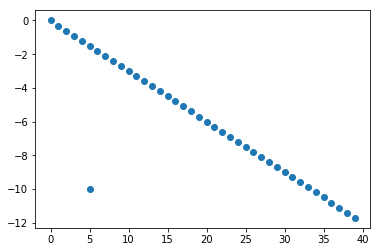

In [77]:
xs, ys = [], []
for i in range(0, 40):
    x = i
    y = - i * 0.3
    xs.append(x)
    ys.append(y)
xs.append(5)
ys.append(-10)
plt.scatter(xs, ys)

In [78]:
linearRegr = LinearRegression()
decision_tree = DecisionTreeRegressor()

In [79]:
from sklearn import cross_validation
loo = cross_validation.LeaveOneOut(len(ys))

In [80]:
score1 = cross_val_score(linearRegr,  np.array(xs).reshape(-1, 1), ys, cv=loo, scoring='mean_squared_error')
score2 = cross_val_score(decision_tree, np.array(xs).reshape(-1, 1), ys, cv=5, scoring='mean_squared_error')
print('MSE for linear regression', score1.mean())
print('Decision tree', score2.mean())

MSE for linear regression -1.8755233368441278
Decision tree -16.852694444444445


Получилось так, как мы и ожидали.